### INTRODUCTION
> We have data that classifies people as having or not having Diabetes disease based on certain characteristics. We'll aim to use this information to build a model that can predict whether or not a patient has this ailment. This is classification task so we will use classifiation algorithm.

In [ ]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to split data 
from sklearn.model_selection import train_test_split, cross_validate


from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Libtune to tune model, get different metric scores
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from collections import Counter


### Read and Understand Data

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/my_workspace/Diabetes_assignment/diabetes_binary_health_indicators_BRFSS2015.csv")

In [ ]:
#shape of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.') 

The dataset has 253680 rows and 22 columns.


In [ ]:
#Check the info of the data set which describes null values, data type, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

``float64`` is the data types of our features. We can easily see if there are any missing values. Here, there are none because each column contains 253680 observations, the same number of rows we saw before with shape

In [ ]:
df = df.astype('int') #convert the data to int type because  Integer arithmetic is faster

### Preprocessing

### Missing Data Check

<font color='cyan'>We can use seaborn to create a simple heatmap to see where we are missing data!</font>

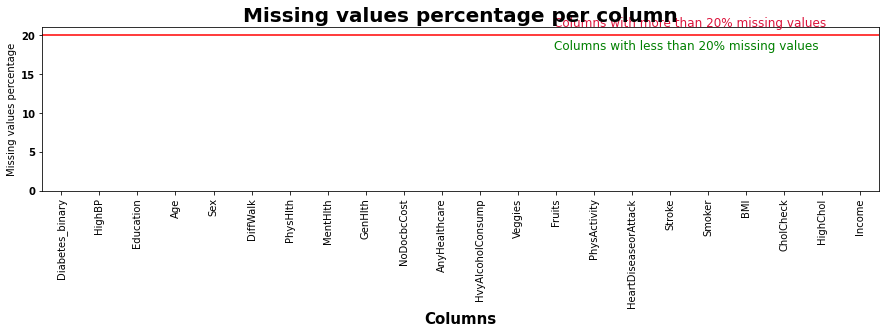

In [ ]:
def msv_1(df, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (df.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(df.isnull().sum()/len(df))/1.7, thresh+2.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(df.isnull().sum()/len(df))/1.7, thresh - 0.5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv_1(df, 20, color=sns.color_palette('Reds',15))

In [ ]:
print(f'There are {df.isnull().any().sum()} columns in diabetes dataset with missing values.')

There are 0 columns in diabetes dataset with missing values.


> Here from the above code we first checked that is there any null values from the IsNull() function then we are going to take the sum of all those missing values from the sum() function and the inference we now get is that there are no missing values.



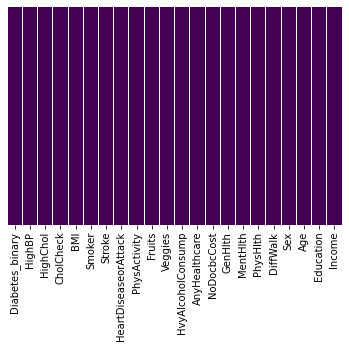

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

> <font color='cyan'><font>So No Missing Data


In [ ]:
df['Diabetes_binary'].value_counts()

0    218334
1     35346
Name: Diabetes_binary, dtype: int64

>Imbalanced!!!!! The Dataset is imbalanced. ``218334`` People have no diabtes and ``35346`` people have diabetes.





### Split Data

In [ ]:
X = df.drop(['Diabetes_binary'],axis=1)
y = df['Diabetes_binary']

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# summarize the class distribution of the training dataset
counter = Counter(y_train)
print(counter)

Counter({0: 174595, 1: 28349})


>  The distribution of observations in the target class is skewed (imbalanced data).

###Feature Scaling

**Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.**

**This can be thought of as subtracting the mean value or centering the data. Scaling the features is of utmost importance because different features are in different scales. Let's say the Age has values in double digits, whereas the DPF is of the kind float, the effect of the Age feature will be more as compared to the DPF**

**Best practice is to use only the training set to figure out how to scale / normalize, then blindly apply the same transform to the test set.**

**For example, say you're going to normalize the data by removing the mean and dividing out the variance. If you use the whole dataset to figure out the feature mean and variance, you're using knowledge about the distribution of the test set to set the scale of the training set - 'leaking' information.**

**The right way to do this is to use only the training set to calculate the mean and variance, normalize the training set, and then at test time, use that same (training) mean and variance to normalize the test set.**

In [ ]:
# Creating StandardScaler instance
sc = StandardScaler()

# Fitting Standard Scaller
X_train = sc.fit_transform(X_train)

# Scaling data
X_test = sc.transform(X_test)

### SAMPLING

> Due to imbalanced data the accuracy predition about diabates are low so we will fix it with SMOTE oversampling method which will make the dataset balanced by samoling method

> SMOTE --> Synthetic Minority Oversampling Technique

In [ ]:
# transform the training dataset
oversample = SMOTE(random_state=33)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
# summarize the new class distribution of the training dataset
counter = Counter(y_train)
print(counter)

Counter({0: 174595, 1: 174595})


> Somewhat balanced than before

## Model Selection

> We are using different classification models to determine Accuracy, ROC AUC, Precision, Recall and F1 score

### Baseline Model

In [ ]:
models = []
models.append(['Logistic Regreesion', LogisticRegression()])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['Decision Tree', DecisionTreeClassifier()])
models.append(['Random Forest', RandomForestClassifier()])
models.append(['AdaBoost', AdaBoostClassifier()])
models.append(['Gradiesnt Boost', GradientBoostingClassifier()])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = metrics.accuracy_score(y_test,y_pred) #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',format(accuracy_score(y_test, y_pred)*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[31691 12048]
 [ 1577  5420]]
Accuracy Score:  73.14530116682435

ROC AUC Score: 0.75

Precision: 0.31

Recall: 0.77

F1: 0.44
-----------------------------------

KNeighbors :
[[32152 11587]
 [ 2674  4323]]
Accuracy Score:  71.89175339009776

ROC AUC Score: 0.68

Precision: 0.27

Recall: 0.62

F1: 0.38
-----------------------------------

GaussianNB :
[[31695 12044]
 [ 1947  5050]]
Accuracy Score:  72.42391989908546

ROC AUC Score: 0.72

Precision: 0.30

Recall: 0.72

F1: 0.42
-----------------------------------

Decision Tree :
[[37998  5741]
 [ 4681  2316]]
Accuracy Score:  79.45837275307474

ROC AUC Score: 0.60

Precision: 0.29

Recall: 0.33

F1: 0.31
-----------------------------------

Random Forest :
[[41216  2523]
 [ 5018  1979]]
Accuracy Score:  85.13678650268054

ROC AUC Score: 0.61

Precision: 0.44

Recall: 0.28

F1: 0.34
-----------------------------------

AdaBoost :
[[35144  8595]
 [ 2412  4585]]
Accuracy Score:  78.30534531693472

ROC AUC Score: 0.

In [ ]:
df_resample = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [ ]:
df_resample.sort_values(by= ['Accuracy'], inplace= True, ascending= False)

In [ ]:
df_resample

,Model,Accuracy,ROC AUC,Precision,Recall,F1
4,Random Forest,85.136787,0.612576,0.439582,0.282836,0.344204
6,Gradiesnt Boost,84.023179,0.684274,0.427715,0.468915,0.447368
7,XGBoost,83.569852,0.690108,0.418184,0.489067,0.450856
3,Decision Tree,79.458373,0.599872,0.287452,0.330999,0.307692
5,AdaBoost,78.305345,0.729387,0.347876,0.655281,0.454478
0,Logistic Regreesion,73.145301,0.749583,0.310282,0.774618,0.443082
2,GaussianNB,72.423920,0.723189,0.295425,0.721738,0.419244
1,KNeighbors,71.891753,0.676462,0.271716,0.617836,0.377439


> From above we can determine, **RandomForest** seems to have high accuracy and **Logistic regression** has highest ROC AUC score also.
> But, we will also tune the model with Grid Search to determine best parameters for different models and to also increase its overall scores.

## HyperParameter Tuning

### Tuning The Models

> The GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               (AdaBoostClassifier(),[{'n_estimators':[100,150,200],'learning_rate':[0.1, 0.5, 0.8, 1],'algorithm':['SAMME', 'SAMME.R'], 'random_state':[0]}]),
               (GradientBoostingClassifier(),[{'n_estimators':[100,150,200],'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}]),
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
               (KNeighborsClassifier(),[{'n_neighbors':[5,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}])]

In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 75.20%
Best Parameters :  {'C': 0.25, 'random_state': 0}

----------------

GaussianNB():
Best Accuracy : 72.10%
Best Parameters :  {'var_smoothing': 1e-09}

----------------

DecisionTreeClassifier():
Best Accuracy : 86.45%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 89.76%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 200, 'random_state': 0}

----------------

AdaBoostClassifier():
Best Accuracy : 86.09%
Best Parameters :  {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 200, 'random_state': 0}

----------------

GradientBoostingClassifier():
Best Accuracy : 89.52%
Best Parameters :  {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'deviance', 'n_estimators': 200, 'random_state': 0}

----------------

XGBClassifier():
Best Accuracy : 86.60%
Best Parameters :  {'eval_metric': 'error', 'learning_rate': 0.1}

----------------



## Models after Tuning Hyperparameters 

After Grid Search, we got best parameters for all the models. Now, we going to tune hyperparameters see how to it perform. <br>

***True Positives (TP)*** - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. <br>

***True Negatives (TN)*** - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. <br>

***False Positives (FP)*** – When actual class is no and predicted class is yes. <br>

***False Negatives (FN)*** – When actual class is yes but predicted class in no. <br>

***Accuracy*** - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Accuracy = TP+TN/TP+FP+FN+TN** <br>

***Precision*** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Precision = TP/TP+FP** <br>

***Recall (Sensitivity)*** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Recall = TP/TP+FN** <br>

 ***F1 score*** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**F1 Score = 2*(Recall * Precision) / (Recall + Precision)** <br>

 ***Support*** - Support is the number of actual occurrences of the class in the specified dataset. Support doesn’t change between models but instead diagnoses the evaluation process. 

### Logistic Regression

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43739
           1       0.55      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736

ROC AUC score: 0.8263580891501994
Accuracy Score:  0.865874329864396


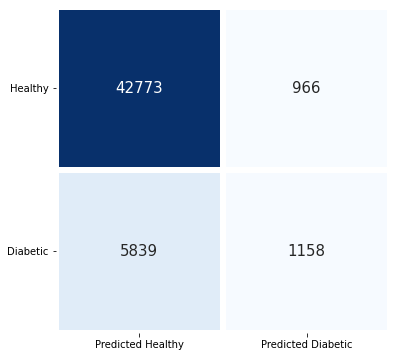

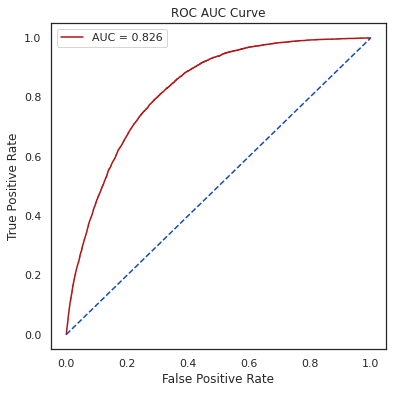

<Figure size 432x432 with 0 Axes>

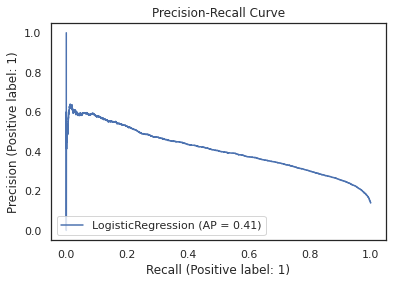

In [ ]:
#Fitting Logistic Regression Model
accuracies = {}
classifier = LogisticRegression(C= 0.25, random_state= 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['Logistic Regression'] = acc

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
plt.figure(figsize = (6, 6))
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

> Test Accuracy of Logistic Regression Algorithm is 86.58%

### KNeighbors

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     43739
           1       0.40      0.21      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.64      0.58      0.60     50736
weighted avg       0.82      0.85      0.83     50736

ROC AUC score: 0.7219123213643022
Accuracy Score:  0.8480171870072533


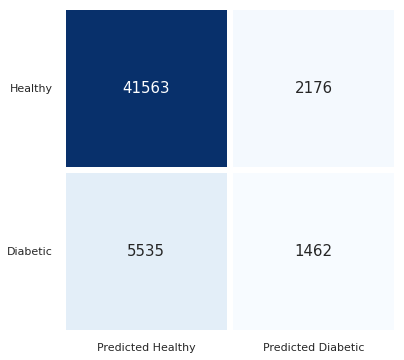

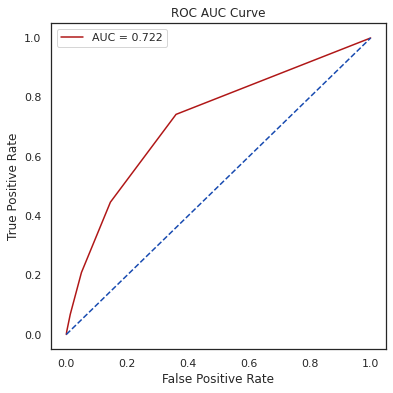

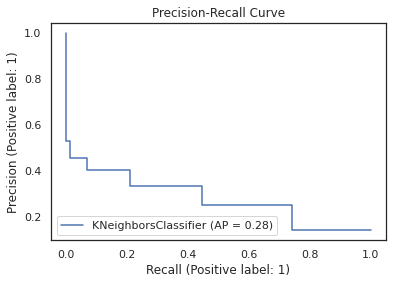

In [ ]:
#Fitting KNeighborsClassifier Model
classifier = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['KNeighbors'] = acc

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

> KNN Model's Accuracy is 84.8%

### GaussianNB

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     43739
           1       0.32      0.57      0.41      6997

    accuracy                           0.77     50736
   macro avg       0.62      0.69      0.63     50736
weighted avg       0.84      0.77      0.80     50736

ROC AUC score: 0.7860311936556714
Accuracy Score:  0.771996215704825


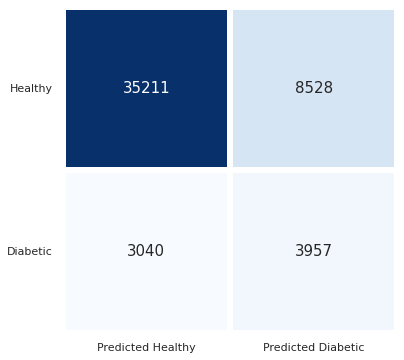

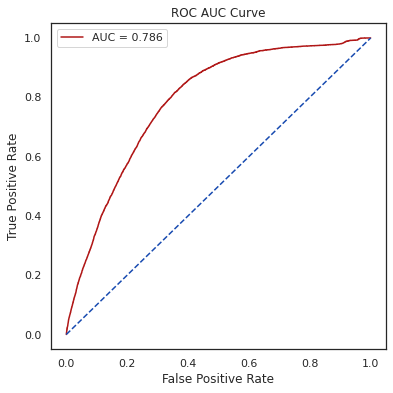

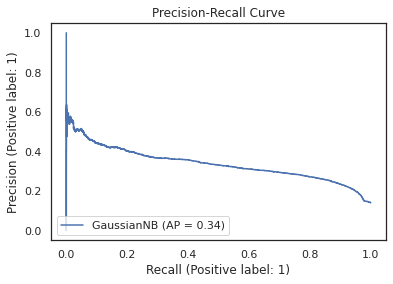

In [ ]:
#Fitting GaussianNB Model
classifier = GaussianNB(var_smoothing= 1e-09)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['GaussianNB'] = acc



sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

> Test Accuracy of GaussianNB Algorithm is 77.19%

### Decision Tree

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     43739
           1       0.30      0.33      0.31      6997

    accuracy                           0.80     50736
   macro avg       0.60      0.60      0.60     50736
weighted avg       0.81      0.80      0.81     50736

ROC AUC score: 0.6005556878486753
Accuracy Score:  0.8017384105960265


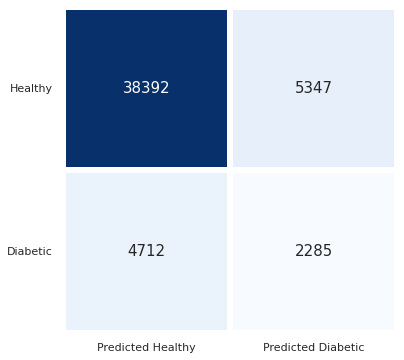

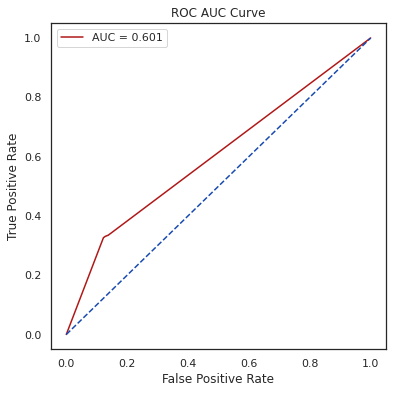

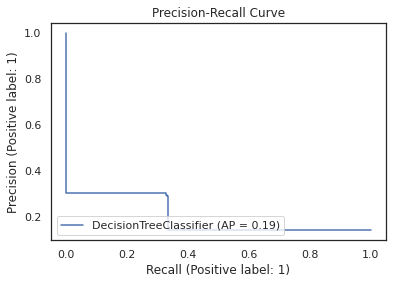

In [ ]:
#Fitting DecisionTreeClassifier Model
classifier = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['Decision Tree'] = acc



sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

> Test Accuracy of Decision Tree Algorithm is 80.17%

### Random Forest

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     43739
           1       0.48      0.17      0.25      6997

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736

ROC AUC score: 0.8046021970797367
Accuracy Score:  0.8600599180069379


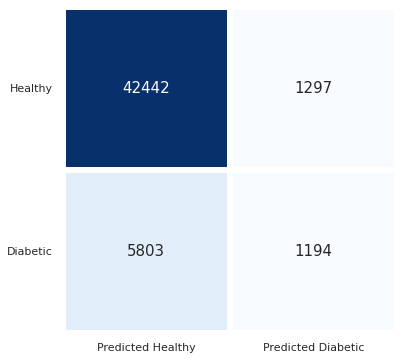

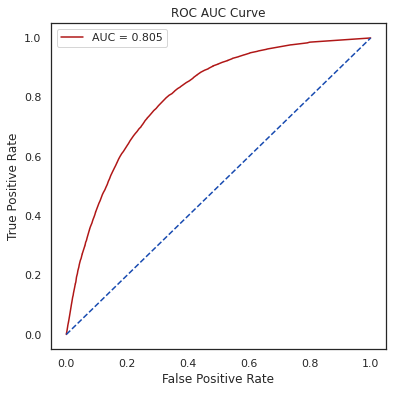

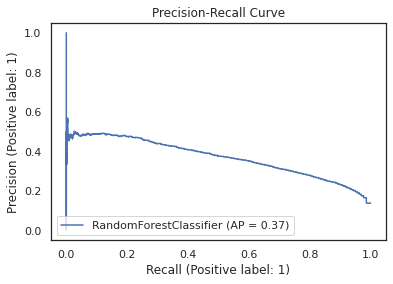

In [ ]:
#Fitting RandomForestClassifier Model
classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 200, random_state= 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['Random Forest'] = acc



sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

> Test Accuracy of Random Forest Algorithm is 86%

### AdaBoost

              precision    recall  f1-score   support

           0       0.88      0.97      0.93     43739
           1       0.55      0.20      0.29      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.59      0.61     50736
weighted avg       0.84      0.87      0.84     50736

ROC AUC score: 0.8317275994304347
Accuracy Score:  0.8670175023651845


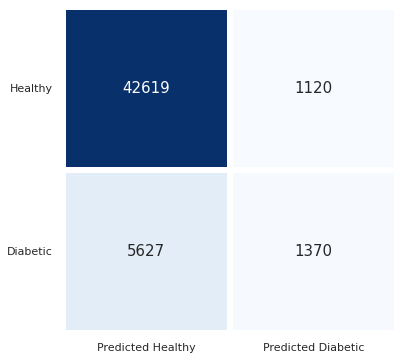

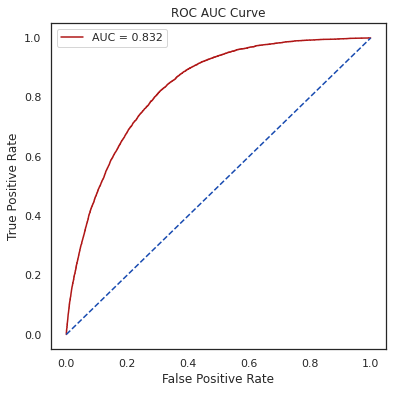

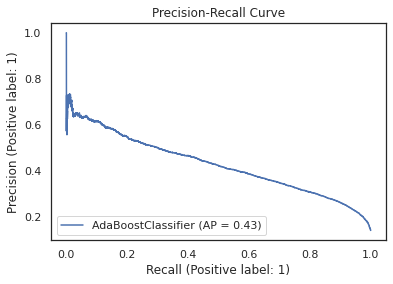

In [ ]:
#Fitting AdaBoostClassifier Model
classifier = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1, n_estimators= 200, random_state= 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)


#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['AdaBoost'] = acc



sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

> Test Accuracy of AdaBoost Algorithm is 86.7%

### Gradient Boost

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43739
           1       0.55      0.17      0.26      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.57      0.59     50736
weighted avg       0.84      0.87      0.84     50736

ROC AUC score: 0.8332938937295369
Accuracy Score:  0.8666430148218228


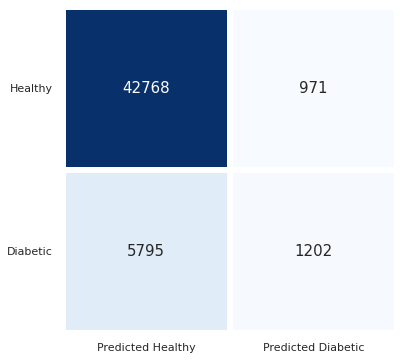

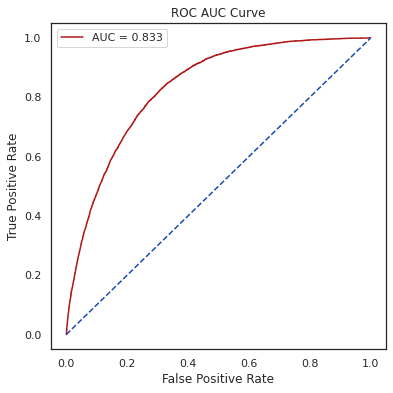

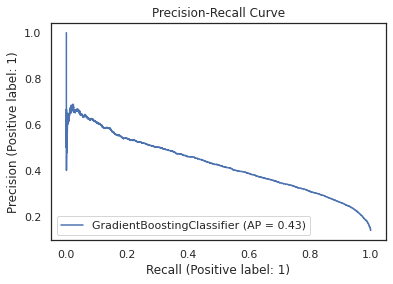

In [ ]:
#Fitting GradientBoostingClassifier Model
classifier = GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.5, loss= 'deviance', n_estimators= 200, random_state= 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['Gradient Boost'] = acc

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

> Test Accuracy of Gradient Boost Algorithm is 86.66%

### XGBoost

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43739
           1       0.58      0.16      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.73      0.57      0.59     50736
weighted avg       0.84      0.87      0.83     50736

ROC AUC score: 0.8341408467091567
Accuracy Score:  0.8678256070640177


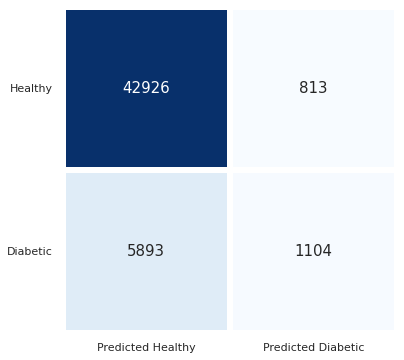

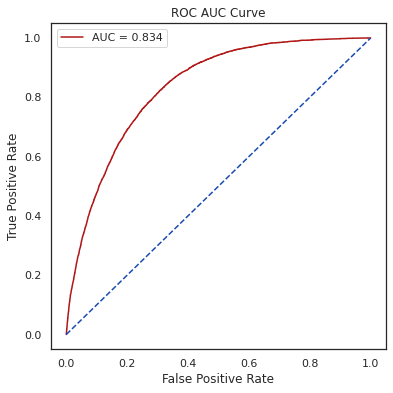

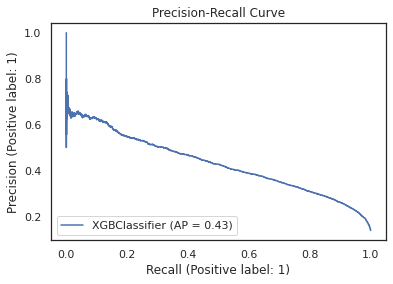

In [ ]:
#Fitting XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['XGBoost'] = acc

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

> Test Accuracy of XGBoost Algorithm is 86.78%

### Comparing Models

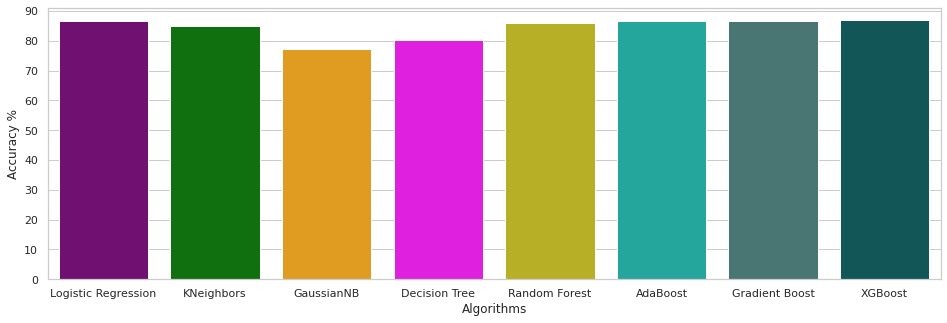

In [ ]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",'#417D7A','#066163','#4D4C7D']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# Summary 
* After conducting significant data analysis, I experimented with various classification models to see how well they performed on the dataset. With accuracy, roc, precision, and recall score, I obtained quite decent results.
* I have use SMOTE oversampling method for imbalanced classification data.
*But I didn't stop there; using Grid Search, I fine-tuned the hyperparamters and viewed the classification report, which included ROC AUC and Precision-Recall curves for various models.
* With that, I came to conclusion that ***Logistic Regression***, ***Random Forest***, and The Boosting Algoritm (***AdaBoost***, ***Gradient Boost***, ***XGBoost***) are models which are best fit for our dataset.
* After Tuning the Hyperparameter **XGBoost Algorithm** has the Highest Accuracy of exactly **86.78%** & AUC of **0.834**.


<div style="color:black;
           display:fill;
           border-radius:5px;
           border:2px solid DodgerBlue;
           background-color:white;
           font-size:150%;
           text-align:center;
           letter-spacing:0.5px">
    
    Thank You!
</div>